In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import os
from skimage import io, transform
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image
import h5py
import numpy as np
from torch.utils.data import Dataset

In [2]:
a = np.asarray([ [1,2,3], [4,5,6], [7,8,9] ])
np.savetxt(results_root+"foo.csv", a, delimiter=",")

NameError: ignored

# **1. Vars**

In [3]:
!ls

drive  sample_data


In [4]:
batch_size = 64
epochs = 50
no_cuda = False
seed = 1
log_interval = 50

cuda = not no_cuda and torch.cuda.is_available()

torch.manual_seed(seed)

In [5]:
!nvidia-smi

Mon Feb 24 03:59:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |     10MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
device = torch.device("cuda" if cuda else "cpu")
kwargs = {'num_workers': 0, 'pin_memory': False} if cuda else {}

In [7]:
device

device(type='cuda')

# **2. Data Loader**

In [0]:
data_root = '/content/drive/My Drive/Colab Notebooks/Data/'
results_root = '/content/drive/My Drive/Colab Notebooks/Results/'

In [0]:
BATCH_SIZE = 64
epochs = 30
seed = 1
log_interval = 50
num_movie_channel = 1

In [0]:
filename = data_root+'movie_cm128_3_runCDEF.mat'
f = h5py.File(filename,'r')
movie = np.array(f.get('movie2')) # runD


In [0]:
movie = movie.swapaxes(1,2) 
#train_movie = movie[:10000,:,:]
#test_movie = movie[10000:,:,:]

In [0]:
train_movie = movie

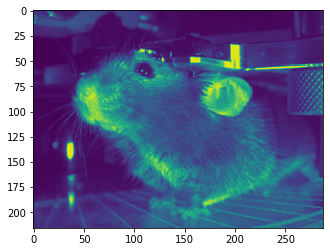

In [99]:
plt.imshow(train_movie[2,:,:])

In [0]:
class MyDataset(Dataset):
    """ My dataset. size = (T, 1, 216, 288])"""

    # Initialize  data
    def __init__(self, train_movie):
        self.train_tensor = torch.from_numpy(train_movie).float()
        self.train_tensor = self.train_tensor.view(
            self.train_tensor.shape[0],1,self.train_tensor.shape[1],self.train_tensor.shape[2])
        self.len = self.train_tensor.shape[0]

    def __getitem__(self, index):
        return self.train_tensor[index]

    def __len__(self):
        return self.len

In [0]:
train_dataset = MyDataset(train_movie)

In [0]:
train_loader = torch.utils.data.DataLoader(
    dataset = train_dataset,
    batch_size = BATCH_SIZE,
    drop_last=True,
     **kwargs)


In [145]:
train_movie.shape

(11981, 216, 288)

In [0]:
#del train_movie 
#del test_movie 
del movie


# **3.Model**

In [44]:
conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=3, padding=1)
conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=2, padding=2)
conv3 = nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2)
conv4 = nn.Conv2d(128, 256, kernel_size=5, stride=2, padding=2)
X = torch.from_numpy(np.random.uniform(size=(64,1,216, 288))).float()
print('conv1_{}'.format(conv1(X).size()))
X = torch.from_numpy(np.random.uniform(size=(64,32,72, 96))).float()
print('conv2_{}'.format(conv2(X).size()))
X = torch.from_numpy(np.random.uniform(size=(64,64,36, 48))).float()
print('conv3_{}'.format(conv3(X).size()))
X = torch.from_numpy(np.random.uniform(size=(64,128,18, 24))).float()
print('conv4_{}'.format(conv4(X).size()))

conv1_torch.Size([64, 32, 72, 96])
conv2_torch.Size([64, 64, 36, 48])
conv3_torch.Size([64, 128, 18, 24])
conv4_torch.Size([64, 256, 9, 12])


In [48]:
conv5 = nn.ConvTranspose2d(256, 128,kernel_size=5, stride=2, padding=2)
conv6 = nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2, padding=2)
conv7 = nn.ConvTranspose2d(64, 32, kernel_size=5, stride=2, padding=2)
conv8 = nn.ConvTranspose2d(32, 1, kernel_size=5, stride=3, padding=1)
X = torch.from_numpy(np.random.uniform(size=(64,256,9, 12))).float()
print('conv5_{}'.format(conv5(X).size()))
X = torch.from_numpy(np.random.uniform(size=(64,128,18, 24))).float()
print('conv6_{}'.format(conv6(X).size()))
X = torch.from_numpy(np.random.uniform(size=(64,64,36, 48))).float()
print('conv7_{}'.format(conv7(X).size()))
X = torch.from_numpy(np.random.uniform(size=(64,32,72, 96))).float()
print('conv8_{}'.format(conv8(X).size()))

conv5_torch.Size([64, 128, 17, 23])
conv6_torch.Size([64, 64, 35, 47])
conv7_torch.Size([64, 32, 71, 95])
conv8_torch.Size([64, 1, 216, 288])


In [57]:
# Latent vectors mu and sigma
fc1 = nn.Linear(9 * 12 * 256, 32)
fc_bn1 = nn.BatchNorm1d(32)
fc21 = nn.Linear(32, 32)
fc22 = nn.Linear(32, 32)
fc3 = nn.Linear(32, 32)
fc_bn3 = nn.BatchNorm1d(32)
fc4 = nn.Linear(32,  9 * 12 * 256)
fc_bn4 = nn.BatchNorm1d( 9 * 12 * 256)


# Decoder
conv5 = nn.ConvTranspose2d(256, 128,kernel_size=5, stride=2, padding=2,output_padding=1)
bn5 = nn.BatchNorm2d(128)
conv6 = nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2, padding=2,output_padding=1)
bn6 = nn.BatchNorm2d(64)
conv7 = nn.ConvTranspose2d(64, 32, kernel_size=5, stride=2, padding=2,output_padding=1)
bn7 = nn.BatchNorm2d(32)
conv8 = nn.ConvTranspose2d(32, 1, kernel_size=5, stride=3, padding=1,output_padding=0)


X = torch.from_numpy(np.random.uniform(size=(64,256,9, 12))).float()

  #        conv4 = self.relu(self.bn4(self.conv4(conv3))).view(-1, 25 * 25 * 16)
  #      fc1 = self.relu(self.fc_bn1(self.fc1(conv4)))
        #  r1 = self.fc21(fc1)
    #    r2 = self.fc22(fc1)


          #fc3 = self.relu(self.fc_bn3(self.fc3(z)))
      #  fc4 = self.relu(self.fc_bn4(self.fc4(fc3))).view(-1, 256, 9, 12)
     #   conv5 = self.relu(self.bn5(self.conv5(fc4)))
       # conv6 = self.relu(self.bn6(self.conv6(conv5)))
     #   conv7 = self.relu(self.bn7(self.conv7(conv6)))
     #   return self.conv8(conv7).view(-1, 1, 216, 288)
X = X.view(64,-1)
print('fc1{}'.format(fc1(X).size()))
z = torch.from_numpy(np.random.uniform(size=(64,32))).float()
print('fc21{}'.format(fc21(z).size()))
z = torch.from_numpy(np.random.uniform(size=(64,32))).float()
print('fc3{}'.format(fc3(z).size()))
z = torch.from_numpy(np.random.uniform(size=(64,32))).float()
print('fc4{}'.format(fc4(z).view(-1, 256, 9, 12).size()))
z = torch.from_numpy(np.random.uniform(size=(64,256,9,12))).float()
print('conv5{}'.format(conv5(z).size()))
z = torch.from_numpy(np.random.uniform(size=(64,128,18,24))).float()
print('conv6{}'.format(conv6(z).size()))
z = torch.from_numpy(np.random.uniform(size=(64,64,36,48))).float()
print('conv7{}'.format(conv7(z).size()))
z = torch.from_numpy(np.random.uniform(size=(64,32,72,96))).float()
print('conv8{}'.format(conv8(z).size()))

fc1torch.Size([64, 32])
fc21torch.Size([64, 32])
fc3torch.Size([64, 32])
fc4torch.Size([64, 256, 9, 12])
conv5torch.Size([64, 128, 18, 24])
conv6torch.Size([64, 64, 36, 48])
conv7torch.Size([64, 32, 72, 96])
conv8torch.Size([64, 1, 216, 288])


In [0]:
class VAE_CNN(nn.Module):
    def __init__(self):
        super(VAE_CNN, self).__init__()
        self.hparam = {'n_latents':32  }
        self.fc_units = 32
        # Encoder
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=2, padding=2)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=5, stride=2, padding=2)
        self.bn4 = nn.BatchNorm2d(256)

        # Latent vectors mu and sigma
        self.fc1 = nn.Linear(9 * 12 * 256, self.fc_units)
        self.fc_bn1 = nn.BatchNorm1d(self.fc_units)
        self.fc21 = nn.Linear(self.fc_units, self.hparam['n_latents'])
        self.fc22 = nn.Linear(self.fc_units, self.hparam['n_latents'])

        # Sampling vector
        self.fc3 = nn.Linear(self.hparam['n_latents'], self.fc_units)
        self.fc_bn3 = nn.BatchNorm1d(self.hparam['n_latents'])
        self.fc4 = nn.Linear(self.fc_units,  9 * 12 * 256)
        self.fc_bn4 = nn.BatchNorm1d( 9 * 12 * 256)

        # Decoder
        self.conv5 = nn.ConvTranspose2d(256, 128,kernel_size=5, stride=2, padding=2,output_padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.conv6 = nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2, padding=2,output_padding=1)
        self.bn6 = nn.BatchNorm2d(64)
        self.conv7 = nn.ConvTranspose2d(64, 32, kernel_size=5, stride=2, padding=2,output_padding=1)
        self.bn7 = nn.BatchNorm2d(32)
        self.conv8 = nn.ConvTranspose2d(32, 1, kernel_size=5, stride=3, padding=1,output_padding=0)

        self.relu = nn.ReLU()

    def encode(self, x):
        conv1 = self.relu(self.bn1(self.conv1(x)))
        conv2 = self.relu(self.bn2(self.conv2(conv1)))
        conv3 = self.relu(self.bn3(self.conv3(conv2)))
        conv4 = self.relu(self.bn4(self.conv4(conv3)))
        conv4 = conv4.view(conv4.size(0), -1)
        # calculate latent vectors
        fc1 = self.relu(self.fc_bn1(self.fc1(conv4)))
        # mu and std
        r1 = self.fc21(fc1)
        r2 = self.fc22(fc1)
        
        return r1, r2

    def reparameterize(self, mu, logvar):
        # sample from latent vectors
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
        else:
            return mu

    def decode(self, z):
        fc3 = self.relu(self.fc_bn3(self.fc3(z)))
        fc4 = self.relu(self.fc_bn4(self.fc4(fc3))).view(-1, 256, 9, 12)
        conv5 = self.relu(self.bn5(self.conv5(fc4)))
        conv6 = self.relu(self.bn6(self.conv6(conv5)))
        conv7 = self.relu(self.bn7(self.conv7(conv6)))
        return self.conv8(conv7).view(-1, 1, 216, 288)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [0]:
class customLoss(nn.Module):
    def __init__(self):
        super(customLoss, self).__init__()
        self.mse_loss = nn.MSELoss(reduction="sum")

    def forward(self, x_recon, x, mu, logvar):
        loss_MSE = self.mse_loss(x_recon, x)
        loss_KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

        return loss_MSE + loss_KLD

In [0]:
#model = VAE_CNN().to(device)
model = VAE_CNN().cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [0]:
loss_mse = customLoss()

# **4. Train**

In [62]:
print(torch.cuda.device_count()) 

1


In [0]:
val_losses = []
train_losses = []
def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_mse(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader),
                       loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
        epoch, train_loss / len(train_loader.dataset)))
    train_losses.append(train_loss / len(train_loader.dataset))
    # Print model's state_dict
    print("Saving model's state_dict:")
    for param_tensor in model.state_dict():
        print(param_tensor, "\t", model.state_dict()[param_tensor].size())

    torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss}, results_root+'epoch_'+str(epoch)+'.pth')
    print("Saved")



In [64]:
for epoch in range(1, epochs + 1):
    train(epoch)
    #test(epoch)
    #with torch.no_grad():
        #sample = torch.randn(64, 2048).to(device)
        #sample = model.decode(sample).cpu()
        #save_image(sample.view(64, 3, 100, 100),
                #   '../results/sample_' + str(epoch) + '.png')

Train Epoch: 1 [0/11981 (0%)]	Loss: 430399232.000000
Train Epoch: 1 [3200/11981 (27%)]	Loss: 423037760.000000
Train Epoch: 1 [6400/11981 (53%)]	Loss: 389030720.000000
Train Epoch: 1 [9600/11981 (80%)]	Loss: 327168096.000000
====> Epoch: 1 Average loss: 381340330.3818
Saving model's state_dict:
conv1.weight 	 torch.Size([32, 1, 5, 5])
conv1.bias 	 torch.Size([32])
bn1.weight 	 torch.Size([32])
bn1.bias 	 torch.Size([32])
bn1.running_mean 	 torch.Size([32])
bn1.running_var 	 torch.Size([32])
bn1.num_batches_tracked 	 torch.Size([])
conv2.weight 	 torch.Size([64, 32, 5, 5])
conv2.bias 	 torch.Size([64])
bn2.weight 	 torch.Size([64])
bn2.bias 	 torch.Size([64])
bn2.running_mean 	 torch.Size([64])
bn2.running_var 	 torch.Size([64])
bn2.num_batches_tracked 	 torch.Size([])
conv3.weight 	 torch.Size([128, 64, 5, 5])
conv3.bias 	 torch.Size([128])
bn3.weight 	 torch.Size([128])
bn3.bias 	 torch.Size([128])
bn3.running_mean 	 torch.Size([128])
bn3.running_var 	 torch.Size([128])
bn3.num_batches

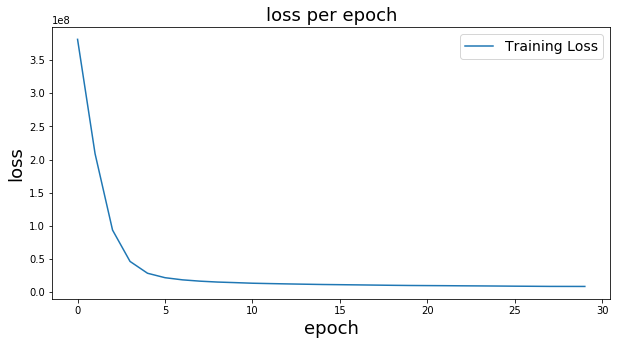

In [67]:
#for batch_x, batch_y in enumerate(train_loader):
    #print(batch_x, batch_y.shape)

plt.figure(figsize=(10,5))
plt.plot(range(len(train_losses)),train_losses)
plt.title("loss per epoch",fontsize=18)
plt.xlabel("epoch",fontsize=18)
plt.ylabel("loss",fontsize=18)
plt.legend(['Training Loss'],fontsize=14)
plt.show()

In [0]:
def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, data in enumerate(val_loader):
            data = data.to(device)
            recon_batch, mu, logvar = model(data)
            test_loss += loss_mse(recon_batch, data, mu, logvar).item()
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                        recon_batch.view(batch_size, 1, 216, 288)[:n]])
                save_image(comparison.cpu(),
                           results_root+'reconstruction/reconstruction_' + str(epoch) + '.png', nrow=n)

    test_loss /= len(val_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))
    val_losses.append(test_loss)

In [0]:
val_dataset = MyDataset(train_movie[1000:1400,:,:])
val_loader = torch.utils.data.DataLoader(
    dataset = val_dataset,
    batch_size = BATCH_SIZE, **kwargs)


In [78]:
test(30)

====> Test set loss: 28796644.1600


In [146]:
train_tensor = torch.from_numpy(train_movie[9000:11981,:,:]).float()
train_tensor = train_tensor.view(
train_tensor.shape[0],1,train_tensor.shape[1],train_tensor.shape[2])
train_tensor.shape

torch.Size([2981, 1, 216, 288])

In [0]:
with torch.no_grad():
    mu, logvar = model.encode(train_tensor.cuda())
    z = model.reparameterize(mu, logvar)

In [0]:
z=z.cpu()

In [0]:
torch.save(z, results_root+'latents/z_9000_11981.pt')

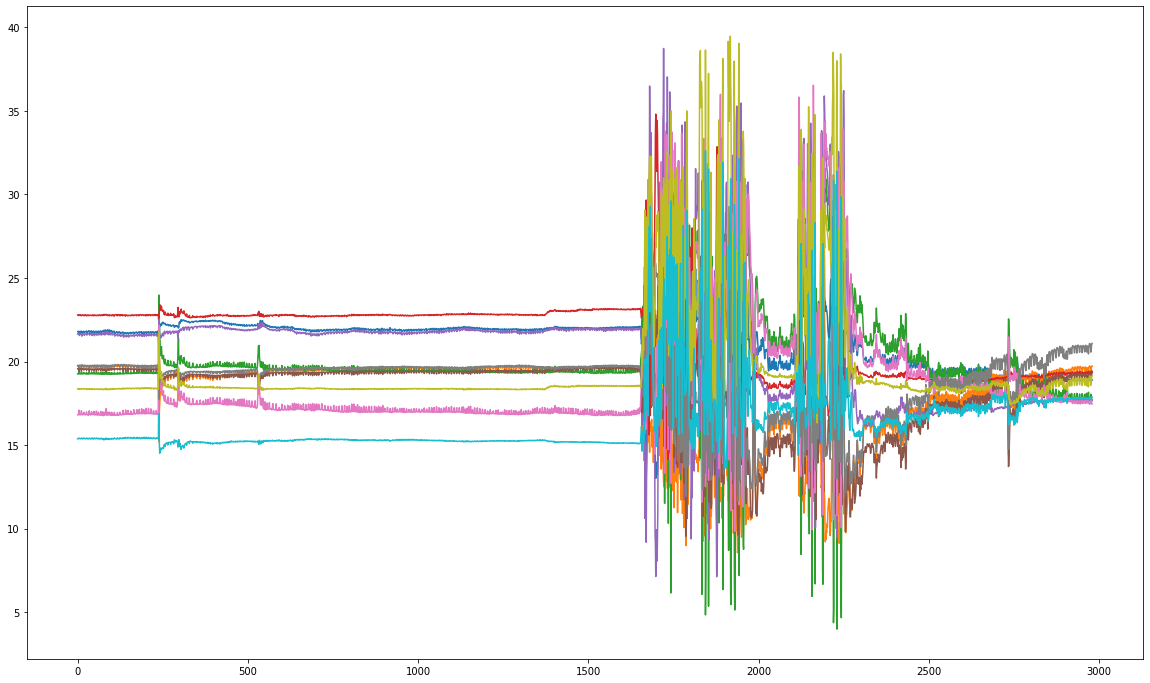

In [152]:
plt.figure(figsize=(20,12))
for i in range(10):
  plt.plot(z[:,i]+19)